## Question 3 - Group 11

In [15]:
import numpy as np 
import pandas as pd
import matplotlib as mlt 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HRDataset_v14.csv')

In [3]:
data = df[['RecruitmentSource','RaceDesc']]

In [4]:
data1 = data.groupby(['RecruitmentSource'])['RaceDesc'].value_counts().reset_index(name='count')
data1 = data1.groupby(['RecruitmentSource', 'RaceDesc'])['count'].aggregate('first').unstack()
data1.to_csv('ques3.csv')
data1 = pd.read_csv('ques3.csv')
data1

,RecruitmentSource,American Indian or Alaska Native,Asian,Black or African American,Hispanic,Two or more races,White
0,CareerBuilder,NaN,2.0,5.0,NaN,NaN,16.0
1,Diversity Job Fair,NaN,NaN,29.0,NaN,NaN,NaN
2,Employee Referral,NaN,1.0,5.0,NaN,NaN,25.0
3,Google Search,1.0,7.0,4.0,NaN,2.0,35.0
4,Indeed,1.0,10.0,17.0,1.0,4.0,54.0
5,LinkedIn,1.0,8.0,16.0,NaN,4.0,47.0
6,On-line Web application,NaN,NaN,NaN,NaN,NaN,1.0
7,Other,NaN,NaN,NaN,NaN,NaN,2.0
8,Website,NaN,1.0,4.0,NaN,1.0,7.0


In [5]:
df_grouped = data.groupby(['RecruitmentSource', 'RaceDesc']).size().reset_index()
table = pd.pivot_table(df_grouped, index=['RecruitmentSource'], columns=['RaceDesc'])
table =table.fillna(0)
b, c = table.iloc[4], table.iloc[8]
temp = table.iloc[4].copy()
table.iloc[4] = c
table.iloc[8] = temp
table=table.rename(index={'Indeed': 'Website','Website': 'Indeed'})
table

0        \
RaceDesc                American Indian or Alaska Native Asian   
RecruitmentSource                                                
CareerBuilder                                        0.0   2.0   
Diversity Job Fair                                   0.0   0.0   
Employee Referral                                    0.0   1.0   
Google Search                                        1.0   7.0   
Website                                              0.0   1.0   
LinkedIn                                             1.0   8.0   
On-line Web application                              0.0   0.0   
Other                                                0.0   0.0   
Indeed                                               1.0  10.0   

                                                                              \
RaceDesc                Black or African American Hispanic Two or more races   
RecruitmentSource                                                              
CareerBuilder                                 5.0      0.0               0.0   
Diversity Job Fair                           29.0      0.0               0.0   
Employee Referral                             5.0      0.0               0.0   
Google Search                                 4.0      0.0               2.0   
Website                                       4.0      0.0               1.0   
LinkedIn                                     16.0      0.0               4.0   
On-line Web application                       0.0      0.0               0.0   
Other                                         0.0      0.0               0.0   
Indeed                                       17.0      1.0               4.0   

                               
RaceDesc                White  
RecruitmentSource              
CareerBuilder            16.0  
Diversity Job Fair        0.0  
Employee Referral        25.0  
Google Search            35.0  
Website                   7.0  
LinkedIn                 47.0  
On-line Web application   1.0  
Other                     2.0  
Indeed                   54.0

In [12]:
color_dict = {'White':'#f7ecb0', 'Two or more races':'#ffb3e6', 'Hispanic':'#99ff99', 'Black or African American':'grey', 'Asian':'#c7b3fb','American Indian or Alaska Native':'#ff6666'}

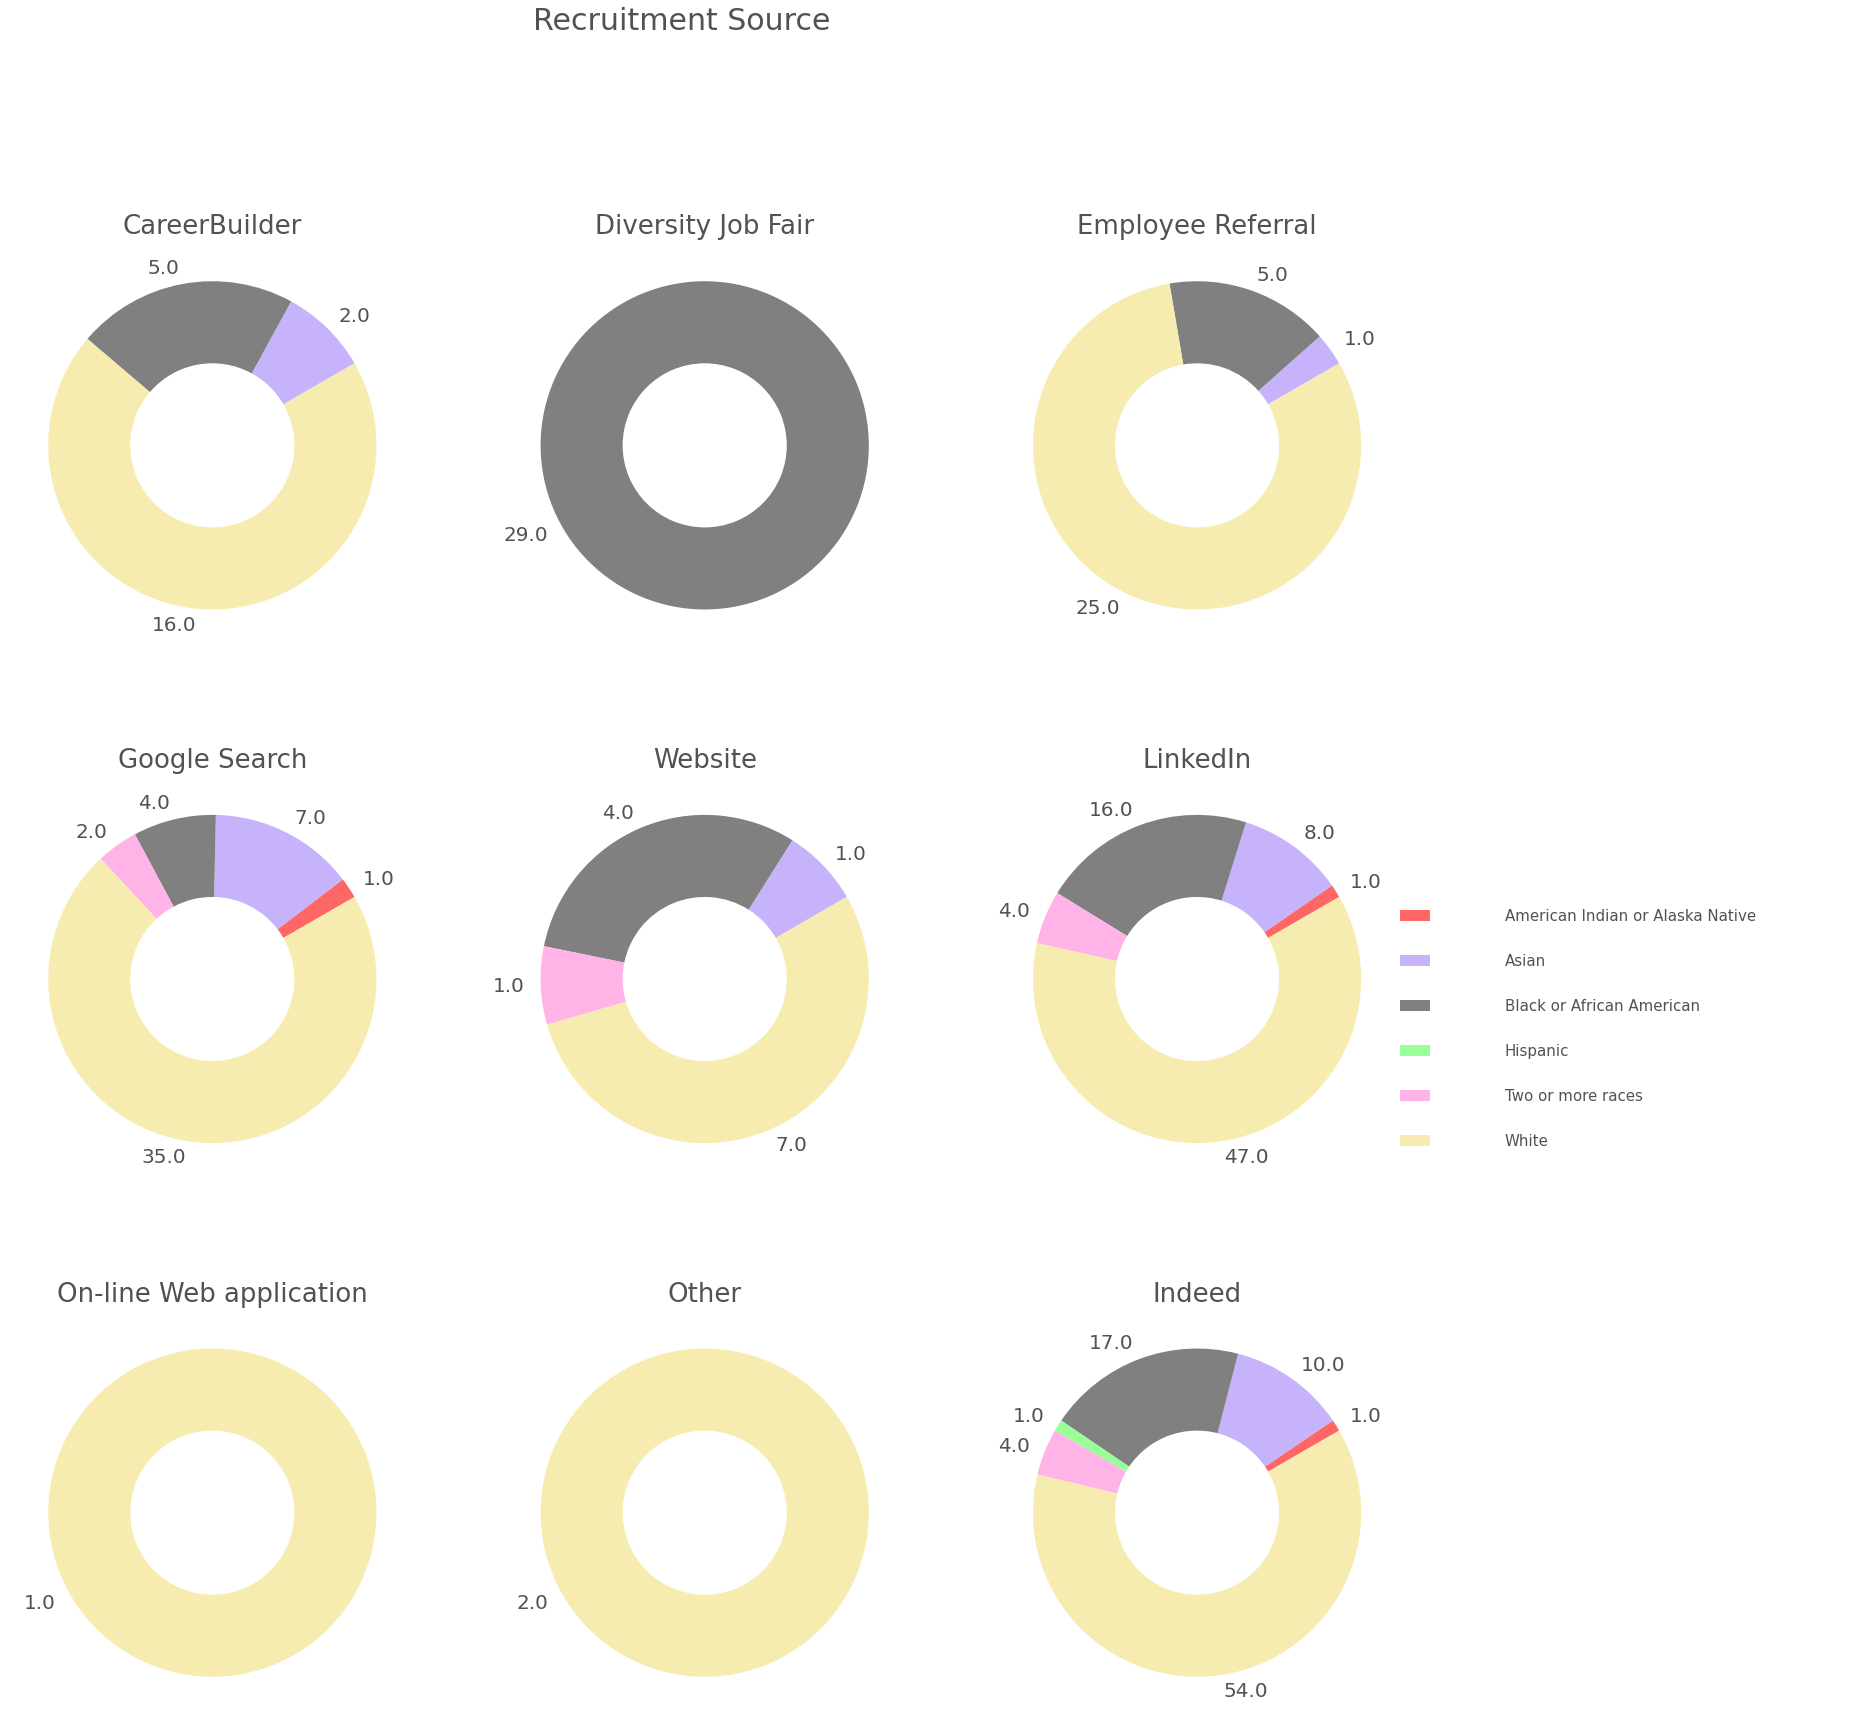

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(25, 30))
label = list(df['RaceDesc'].unique())
font_color = '#525252'
for i, (idx, row) in enumerate(table.iterrows()):
    ax = axes[i // 3, i % 3]
    row = row[row.gt(row.sum() * .01)]
    colorkeys = [x[1] for x in row.index]
    colors = []
    for name in colorkeys:
        colors.append(color_dict[name])
    ax.pie(row, 
           labels=row.values, 
           startangle=30, 
           wedgeprops=dict(width=.5),
           colors=colors,
           textprops={'color':font_color,'fontsize': 20})
    ax.set_title(idx, fontsize=26, color=font_color)
    
    legend = plt.legend([x[1] for x in row.index], 
                        bbox_to_anchor=(2.1, 2.21),
                        loc='upper right',  
                        ncol=1, 
                        fancybox=True, borderpad = 6, labelspacing =2, frameon = False, handletextpad=5, prop={'size':15})
    for text in legend.get_texts():
        plt.setp(text, color=font_color) 
fig.subplots_adjust(wspace=.2) 

title = fig.suptitle('Recruitment Source', y=.95, fontsize=30, color=font_color)
plt.subplots_adjust(top=0.85, bottom=0.15)
plt.savefig('Third.png')